### Batch: CODSOFT June 2023

### Data Science Internship

### Task 4: Sales Prediction using Python

#### Intern: Khushboo Singh

### Business Case: Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

In [3]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.DataFrame(pd.read_csv('advertising.csv'))
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
## First five rows
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
## Last five rows
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
## Shape of data
data.shape

(200, 4)

In [10]:
## Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
## Statistics of data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
## Checking null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

* There are no NULL values in the dataset

### Exploratory Data Analysis

#### Univariate analysis

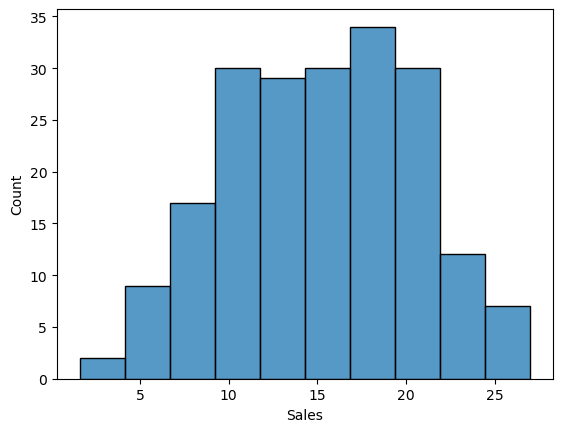

In [18]:
sns.histplot(data['Sales'])
plt.show()

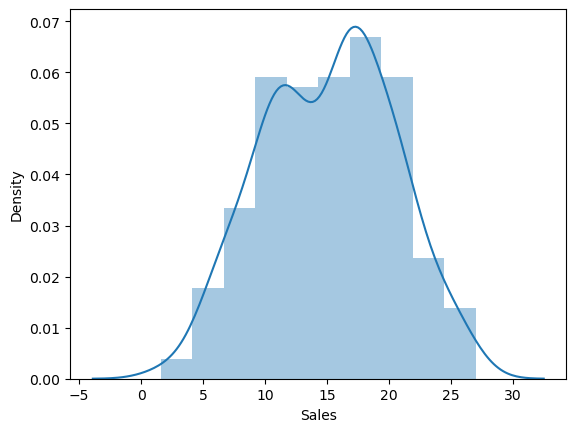

In [22]:
sns.distplot(data['Sales'])
plt.show()

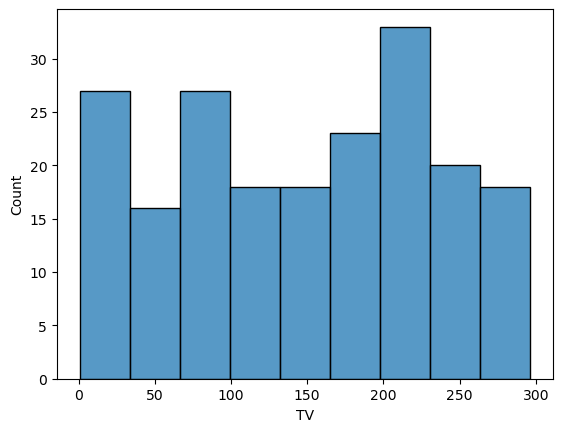

In [19]:
sns.histplot(data['TV'])
plt.show()

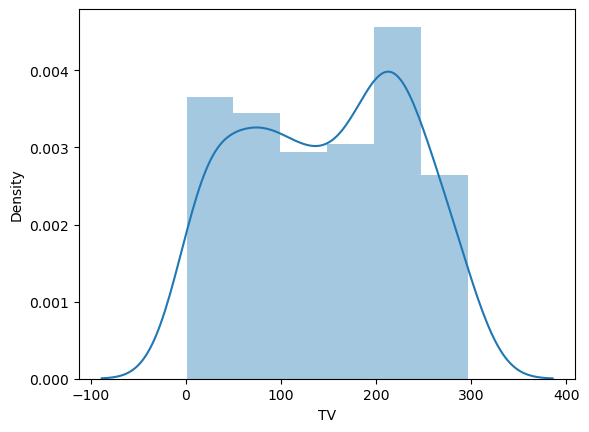

In [23]:
sns.distplot(data['TV'])
plt.show()

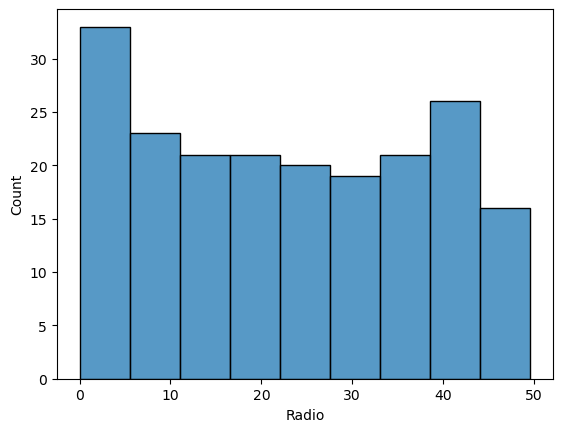

In [20]:
sns.histplot(data['Radio'])
plt.show()

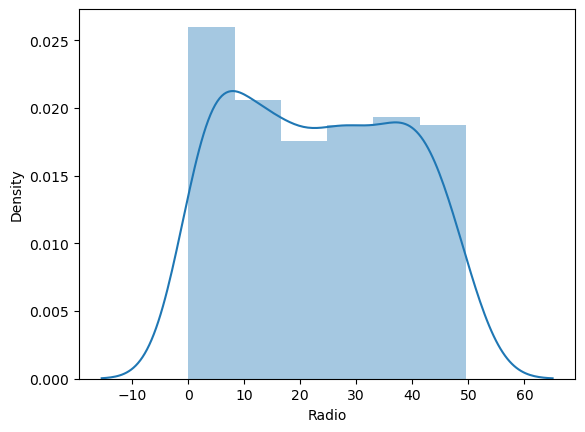

In [24]:
sns.distplot(data['Radio'])
plt.show()

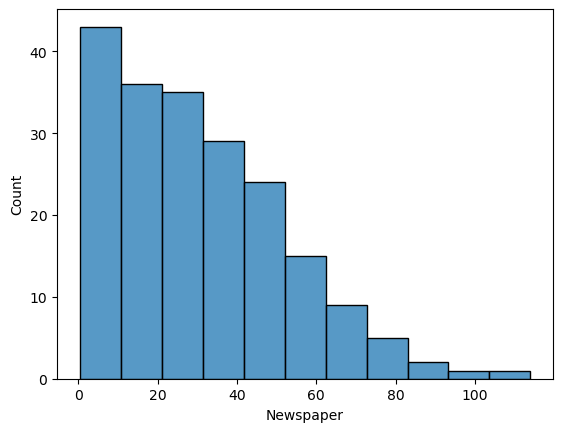

In [21]:
sns.histplot(data['Newspaper'])
plt.show()

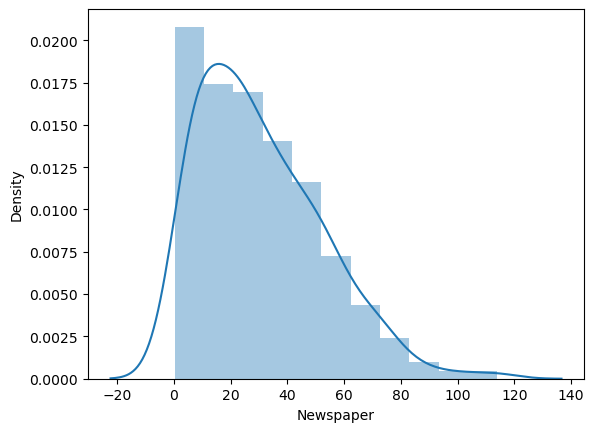

In [25]:
sns.distplot(data['Newspaper'])
plt.show()

#### Outlier Analysis

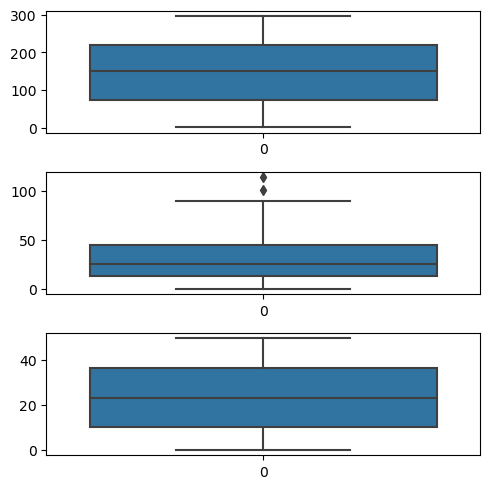

In [15]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

#### Multivariate analysis

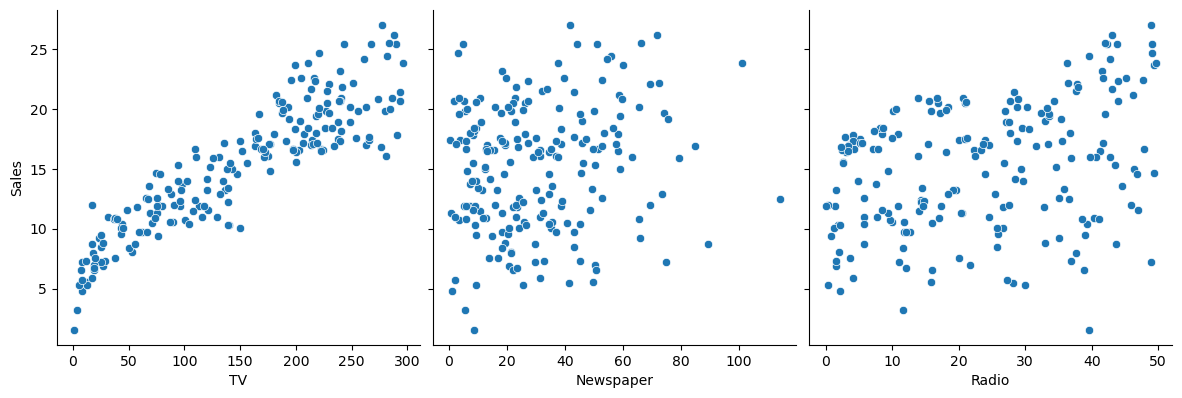

In [27]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

### Feature Engineering

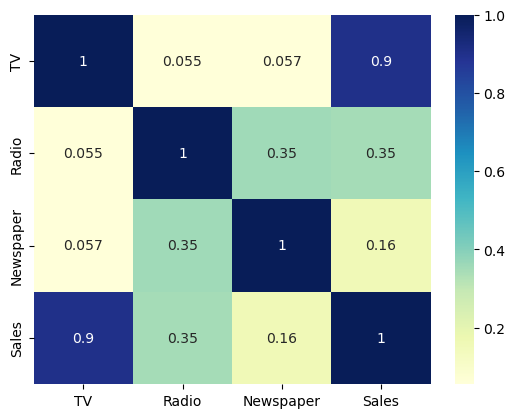

In [28]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

* The variable TV seems to be most correlated with Sales

### Model Creation

In [29]:
## Creating dependent and independent variables
x = data['TV']
y = data['Sales']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
x_train.shape

(140,)

In [33]:
y_train.shape

(140,)

In [34]:
x_test.shape

(60,)

In [35]:
y_test.shape

(60,)

In [37]:
import statsmodels.api as sm

#### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [39]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.52e-52
Time:                        23:31:41   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

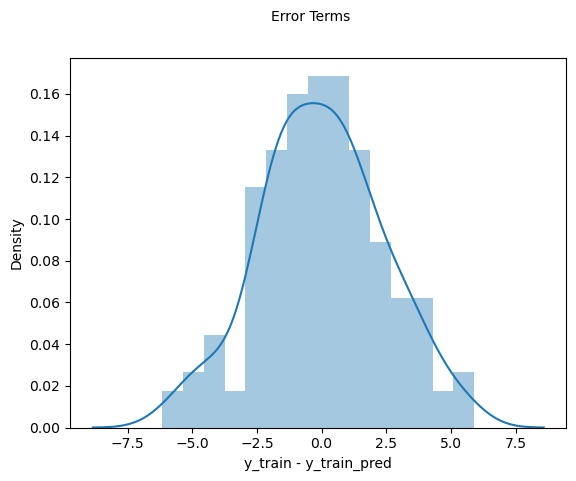

In [42]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 10)                  
plt.xlabel('y_train - y_train_pred', fontsize = 10)         
plt.show()

* The residuals are normally distributed with a mean 0.

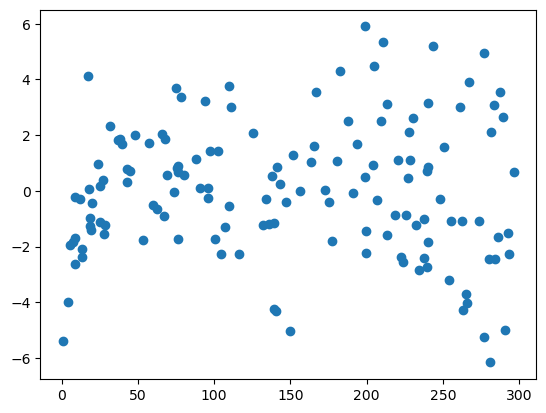

In [43]:
plt.scatter(x_train,res)
plt.show()

In [44]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [45]:
y_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [48]:
mse=np.sqrt(mean_squared_error(y_test, y_pred))
mse

2.019296008966233

In [49]:
r2score = r2_score(y_test, y_pred)
r2score

0.7921031601245658

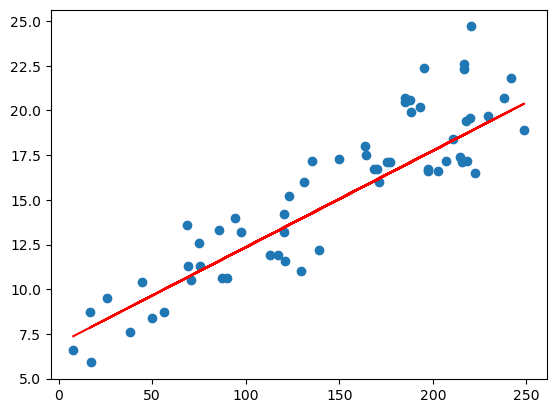

In [51]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()